In [2]:
# simulated annealing
import numpy as np
def f(x, m1 = 20, sigma1=2.5, m2=10, sigma2=10, m3=70, sigma3=20, noise=False):
    res = 20 * np.exp(- (x - m1) ** 2 / (2 * sigma1) ** 2)
    res += 10 * np.exp(- (x - m2) ** 2 / (2 * sigma2) ** 2)
    res += 15 * np.exp(- (x - m3) ** 2 / (2 * sigma3) ** 2)
    if noise:
        return res + 2 * np.random.rand(*res.shape)
    return res

In [3]:
def acceptance_probability(new_objective_function, old_objective_function, T):
    return np.exp( (new_objective_function - old_objective_function) / T)

def neighbor(x, low=0, high=100):
    return high * np.random.rand()

def objective_function(x):
    return f(x)

Right now, neighbor(x) samples randomly from the range [0, 100], which might make the search inefficient for large spaces.
we will limite the step size based on the current temperature. This would allow the algorithm to make small steps at lower temperatures, focusing more closely on promising regions.

In [6]:
'''updated neighbor function'''
def neighbor(x, step_size, low=0, high=100):
    step = step_size * np.random.randn()
    return np.clip(x + step, low, high)


In [8]:

def simulated_annealing(x0, objective_function, save_hist=False):
    """ Simulated annealing

    Parameters
    ----------
    x0 : float
        initial x

    objective_function : function
        connection to the function to be evaluated

    save_hist : bool
        return the history of accepted probabilities

    """

    x = x0
    old_objective_function = objective_function(x0)
    T = 1.0 # temperature
    T_min = 0.0001
    alpha = 0.9 # rate of which the temperature reduces

    if save_hist:
        hist = [x]

    while T > T_min:
        i = 1
        while i <= 100:
            new_x = neighbor(x, step_size=T)
            new_objective_function = objective_function(new_x)

            ap = acceptance_probability(new_objective_function, old_objective_function, T)

            if ap > np.random.rand():
                x = new_x
                old_objective_function = new_objective_function

                if save_hist:
                    hist.append(new_x)

            i += 1
        T = T * alpha

    if save_hist:
        return x, old_objective_function, np.array(hist)

    return x, old_objective_function



19.880759267640613


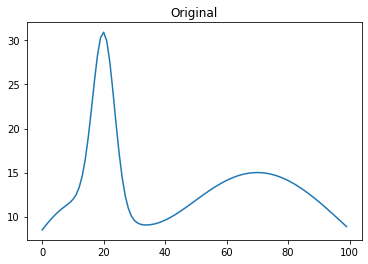

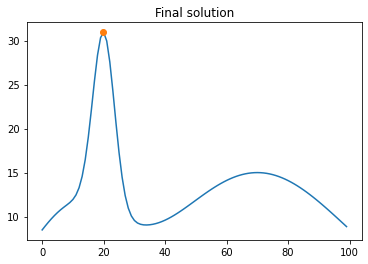

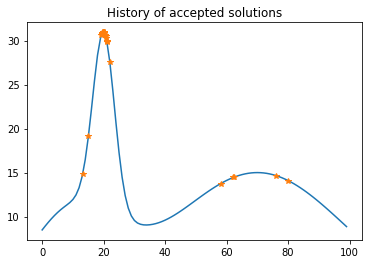

In [5]:
from matplotlib.pyplot import figure, plot, title, show

x = np.arange(100)
figure()
plot(x, f(x))
title('Original')

x_final, objective_function_final, xs = simulated_annealing(80, f, True)

print(x_final)

figure()
plot(x, f(x))
plot(x_final, f(x_final), 'o')
title('Final solution')

figure()
plot(x, f(x))
plot(xs, f(xs), '*')
title('History of accepted solutions')

show()


In [10]:
for noise_level in [0.1, 0.5, 1.0, 2.0]:
    x_final, obj_final, xs = simulated_annealing(80, lambda x: f(x, noise=True), save_hist=True)
    print(f"Final x with noise level {noise_level}: {x_final}")

Final x with noise level 0.1: 66.51485420531385
Final x with noise level 0.5: 65.3910571128203
Final x with noise level 1.0: 66.48702833399707
Final x with noise level 2.0: 71.75205348355851


Noise level: 0.1, Final x: 69.41244579119653, Deviation: 0.5875542088034678
Noise level: 0.5, Final x: 68.99976193621234, Deviation: 1.0002380637876627
Noise level: 1.0, Final x: 56.25106046153729, Deviation: 13.748939538462707
Noise level: 2.0, Final x: 77.07978853107677, Deviation: 7.0797885310767725
Noise level: 5.0, Final x: 81.81279279187409, Deviation: 11.812792791874088
Noise level: 10.0, Final x: 80.1390985994566, Deviation: 10.139098599456602
Noise level: 20.0, Final x: 78.86666358764954, Deviation: 8.86666358764954


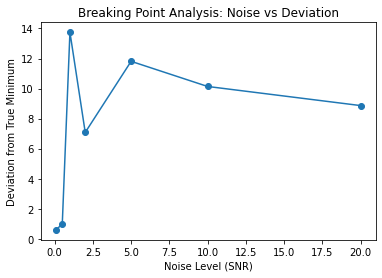

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, m1=20, sigma1=2.5, m2=10, sigma2=10, m3=70, sigma3=20, noise=0):
    """Modified function to include noise"""
    res = 20 * np.exp(- (x - m1) ** 2 / (2 * sigma1) ** 2)
    res += 10 * np.exp(- (x - m2) ** 2 / (2 * sigma2) ** 2)
    res += 15 * np.exp(- (x - m3) ** 2 / (2 * sigma3) ** 2)

    if noise:
        return res + noise * np.random.randn(*res.shape)
    return res

def breaking_point_analysis():
    noise_levels = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0]  # making different Different SNR levels
    true_min_x = 70  
    deviations = []

    for noise_level in noise_levels:
        x_final, objective_function_final = simulated_annealing(80, lambda x: f(x, noise=noise_level), save_hist=False)
        deviation = abs(x_final - true_min_x)  # Difference from true minimum
        deviations.append(deviation)
        print(f"Noise level: {noise_level}, Final x: {x_final}, Deviation: {deviation}")

   #plottings resuts
    plt.figure()
    plt.plot(noise_levels, deviations, marker='o')
    plt.xlabel("Noise Level (SNR)")
    plt.ylabel("Deviation from True Minimum")
    plt.title("Breaking Point Analysis: Noise vs Deviation")
    plt.show()


breaking_point_analysis()


Final analysis

Noise level: 0, Final objective: 0.0, Deviation: 0.0
Noise level: 0.1, Final objective: 0.05319019088071056, Deviation: 0.05319019088071056
Noise level: 0.5, Final objective: 0.26054552673941334, Deviation: 0.26054552673941334
Noise level: 1.0, Final objective: 0.1833206489626268, Deviation: 0.1833206489626268
Noise level: 2.0, Final objective: 0.21311485357105897, Deviation: 0.21311485357105897
Noise level: 5.0, Final objective: 3.9270582140493824, Deviation: 3.9270582140493824
Noise level: 10.0, Final objective: 1.9481337362525906, Deviation: 1.9481337362525906


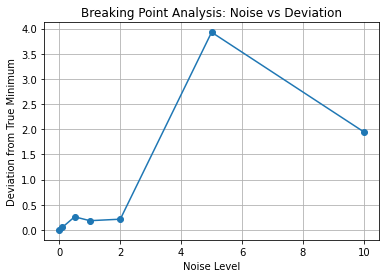

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define Rastrigin's function
def f(x, noise=0):
    A = 10
    return A * len(x) + sum((xi ** 2 - A * np.cos(2 * np.pi * xi)) for xi in x) + noise * np.random.rand()

# Acceptance probability
def acceptance_probability(new_obj, old_obj, T):
    return np.exp((old_obj - new_obj) / T)

# Neighbor function
def neighbor(x, step_size=1):
    return x + np.random.uniform(-step_size, step_size, size=x.shape)

# Simulated Annealing
def simulated_annealing(x0, objective_function, save_hist=False):
    x = x0
    old_obj = objective_function(x0)
    T = 1.0
    T_min = 0.0001
    alpha = 0.9

    if save_hist:
        hist = [x.copy()]

    while T > T_min:
        new_x = neighbor(x)
        new_obj = objective_function(new_x)

        if acceptance_probability(new_obj, old_obj, T) > np.random.rand():
            x = new_x
            old_obj = new_obj
            if save_hist:
                hist.append(x.copy())

        T *= alpha

    return x, old_obj

# Breaking Point Analysis
def breaking_point_analysis():
    noise_levels = [0, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]  # Different noise levels
    true_min = 0  # True minimum value for Rastrigin's function
    deviations = []

    for noise_level in noise_levels:
        x_final, obj_final = simulated_annealing(np.zeros(2), lambda x: f(x, noise=noise_level))
        deviation = np.abs(obj_final - true_min)
        deviations.append(deviation)
        print(f"Noise level: {noise_level}, Final objective: {obj_final}, Deviation: {deviation}")

    # Plotting the results
    plt.figure()
    plt.plot(noise_levels, deviations, marker='o')
    plt.xlabel("Noise Level")
    plt.ylabel("Deviation from True Minimum")
    plt.title("Breaking Point Analysis: Noise vs Deviation")
    plt.grid()
    plt.show()

# Run the analysis
breaking_point_analysis()
